In [24]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data_training.csv"  #file name 

In [25]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance
0,0,37.204,37.204,29.521,-1118.082,-0.081
1,1,44.755,44.755,36.582,-542.296,0.191
2,2,30.354,30.354,19.491,-582.567,0.080
3,3,10.095,10.095,19.491,-319.435,77.484
4,4,31.074,31.074,21.389,-1085.556,-0.039


In [26]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [27]:
failed = data_test[data_test['Stop_Distance'] <= 0]
passed = data_test[data_test['Stop_Distance'] > 0]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

failed.to_csv("crashed.csv",index=False)
failed.head()

Size of crashes : 1746
Size of success : 7254
Percentage of crash cases:19.40 %
Percentage of not crashed cases:80.60 %


,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance
0,0,37.204,37.204,29.521,-1118.082,-0.081
4,4,31.074,31.074,21.389,-1085.556,-0.039
6,6,43.507,43.507,35.243,-1140.972,-0.240
7,7,39.895,39.895,31.280,-1125.121,-0.214
12,12,25.581,25.581,13.595,-1054.380,-0.073


In [28]:
passed.to_csv("not_crashed.csv",index=False  )
passed.head()

,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance
1,1,44.755,44.755,36.582,-542.296,0.191
2,2,30.354,30.354,19.491,-582.567,0.080
3,3,10.095,10.095,19.491,-319.435,77.484
5,5,18.662,18.662,21.389,-35.732,25.873
8,8,13.855,13.855,31.280,-192.953,63.569


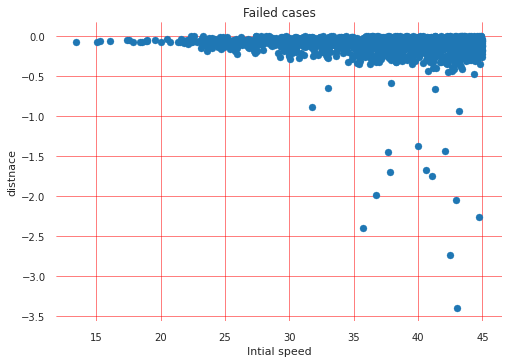

In [29]:
plt.scatter(failed["NN_start_speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

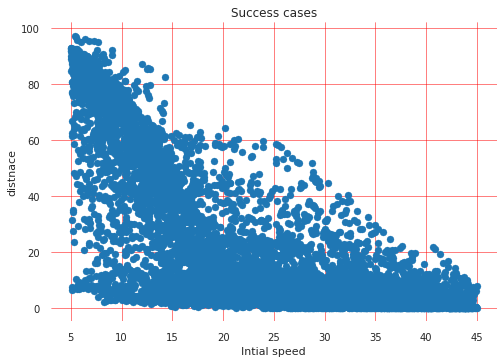

In [30]:
plt.scatter(passed["NN_start_speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

In [31]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(0)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(1)
data_test.head()

,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance,test
0,0,37.204,37.204,29.521,-1118.082,-0.081,0.0
1,1,44.755,44.755,36.582,-542.296,0.191,1.0
2,2,30.354,30.354,19.491,-582.567,0.080,1.0
3,3,10.095,10.095,19.491,-319.435,77.484,1.0
4,4,31.074,31.074,21.389,-1085.556,-0.039,0.0


Total number of episodes: 9000
Number of Pass: 2784
Number of fail: 216


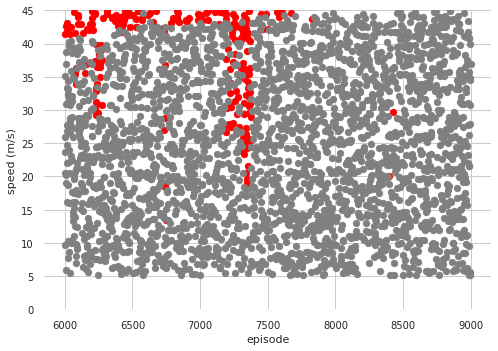

In [88]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=6000
end=9000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['NN_start_speed'].values.tolist()[start:end])

indices = test == 1
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0, 45])
plt.xlabel('episode')
plt.ylabel('speed (m/s)')
ax.grid(True) 
plt.show()

Failures:  [347, 311, 286, 227, 193, 166, 108, 106, 2]


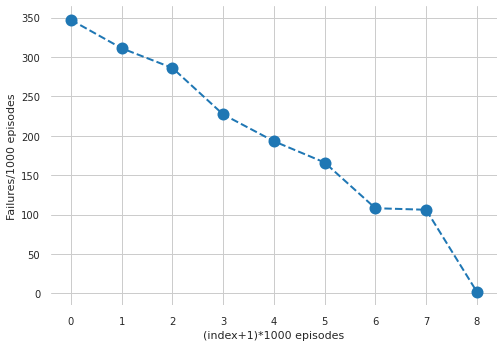

In [35]:
step=1000
failure=[]
fig, ax = plt.subplots()
for i in range(int(data_test['Episode'].shape[0]/step)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.shape[0]-indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   

In [89]:
#data for AVF training:
iteration_start=6000
iteration_end=9000
data=data_test[["Episode", "Kick_Speed","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed"]].values,axis=0)
data[["Episode", "Kick_Speed"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

std is: [866.02535567  11.45910069]
Mean is: [7499.5          25.28115233]


,Episode,Kick_Speed,test
6000,-1.731474,-1.355355,1.0
6001,-1.730319,0.055488,1.0
6002,-1.729164,1.408998,0.0
6003,-1.728009,0.862445,1.0
6004,-1.726855,-0.141997,1.0


In [94]:
#AVF Training 


X=data[["Episode","Kick_Speed"]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(2,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;


(3000, 2)
(3000,)
(2,)
Train on 2010 samples
Epoch 1/500
2010/2010 [==============================] - 1s 568us/sample - loss: 0.2522 - acc: 0.9134
Epoch 2/500
2010/2010 [==============================] - 1s 495us/sample - loss: 0.1665 - acc: 0.9323
Epoch 3/500
2010/2010 [==============================] - 1s 465us/sample - loss: 0.1612 - acc: 0.9358
Epoch 4/500
2010/2010 [==============================] - 1s 492us/sample - loss: 0.1596 - acc: 0.9358
Epoch 5/500
2010/2010 [==============================] - 1s 535us/sample - loss: 0.1585 - acc: 0.9363
Epoch 6/500
2010/2010 [==============================] - 1s 533us/sample - loss: 0.1556 - acc: 0.9378
Epoch 7/500
2010/2010 [==============================] - 1s 529us/sample - loss: 0.1542 - acc: 0.9383
Epoch 8/500
2010/2010 [==============================] - 1s 531us/sample - loss: 0.1521 - acc: 0.9418
Epoch 9/500
2010/2010 [==============================] - 1s 504us/sample - loss: 0.1513 - acc: 0.9423
Epoch 10/500
2010/2010 [=============

2010/2010 [==============================] - 1s 532us/sample - loss: 0.0930 - acc: 0.9667
Epoch 81/500
2010/2010 [==============================] - 1s 528us/sample - loss: 0.0911 - acc: 0.9662
Epoch 82/500
2010/2010 [==============================] - 1s 528us/sample - loss: 0.0905 - acc: 0.9667
Epoch 83/500
2010/2010 [==============================] - 1s 536us/sample - loss: 0.0948 - acc: 0.9647
Epoch 84/500
2010/2010 [==============================] - 1s 532us/sample - loss: 0.0907 - acc: 0.9677
Epoch 85/500
2010/2010 [==============================] - 1s 531us/sample - loss: 0.0904 - acc: 0.9697
Epoch 86/500
2010/2010 [==============================] - 1s 535us/sample - loss: 0.0908 - acc: 0.9662
Epoch 87/500
2010/2010 [==============================] - 1s 529us/sample - loss: 0.0917 - acc: 0.9692
Epoch 88/500
2010/2010 [==============================] - 1s 537us/sample - loss: 0.0907 - acc: 0.9687
Epoch 89/500
2010/2010 [==============================] - 1s 531us/sample - loss: 0.09

2010/2010 [==============================] - 1s 532us/sample - loss: 0.0852 - acc: 0.9701
Epoch 160/500
2010/2010 [==============================] - 1s 536us/sample - loss: 0.0852 - acc: 0.9721
Epoch 161/500
2010/2010 [==============================] - 1s 533us/sample - loss: 0.0865 - acc: 0.9701
Epoch 162/500
2010/2010 [==============================] - 1s 526us/sample - loss: 0.0837 - acc: 0.9682
Epoch 163/500
2010/2010 [==============================] - 1s 532us/sample - loss: 0.0839 - acc: 0.9716
Epoch 164/500
2010/2010 [==============================] - 1s 527us/sample - loss: 0.0864 - acc: 0.9667
Epoch 165/500
2010/2010 [==============================] - 1s 535us/sample - loss: 0.0843 - acc: 0.9701
Epoch 166/500
2010/2010 [==============================] - 1s 532us/sample - loss: 0.0865 - acc: 0.9701
Epoch 167/500
2010/2010 [==============================] - 1s 533us/sample - loss: 0.0848 - acc: 0.9697
Epoch 168/500
2010/2010 [==============================] - 1s 532us/sample - l

2010/2010 [==============================] - 1s 533us/sample - loss: 0.0847 - acc: 0.9682
Epoch 238/500
2010/2010 [==============================] - 1s 530us/sample - loss: 0.0803 - acc: 0.9711
Epoch 239/500
2010/2010 [==============================] - 1s 535us/sample - loss: 0.0830 - acc: 0.9697
Epoch 240/500
2010/2010 [==============================] - 1s 535us/sample - loss: 0.0842 - acc: 0.9711
Epoch 241/500
2010/2010 [==============================] - 1s 526us/sample - loss: 0.0806 - acc: 0.9706
Epoch 242/500
2010/2010 [==============================] - 1s 528us/sample - loss: 0.0815 - acc: 0.9697
Epoch 243/500
2010/2010 [==============================] - 1s 527us/sample - loss: 0.0814 - acc: 0.9701
Epoch 244/500
2010/2010 [==============================] - 1s 536us/sample - loss: 0.0824 - acc: 0.9701
Epoch 245/500
2010/2010 [==============================] - 1s 530us/sample - loss: 0.0809 - acc: 0.9706
Epoch 246/500
2010/2010 [==============================] - 1s 536us/sample - l

2010/2010 [==============================] - 1s 529us/sample - loss: 0.0812 - acc: 0.9692
Epoch 316/500
2010/2010 [==============================] - 1s 537us/sample - loss: 0.0801 - acc: 0.9706
Epoch 317/500
2010/2010 [==============================] - 1s 530us/sample - loss: 0.0800 - acc: 0.9701
Epoch 318/500
2010/2010 [==============================] - 1s 538us/sample - loss: 0.0793 - acc: 0.9736
Epoch 319/500
2010/2010 [==============================] - 1s 530us/sample - loss: 0.0787 - acc: 0.9711
Epoch 320/500
2010/2010 [==============================] - 1s 537us/sample - loss: 0.0810 - acc: 0.9701
Epoch 321/500
2010/2010 [==============================] - 1s 538us/sample - loss: 0.0799 - acc: 0.9716s - loss: 
Epoch 322/500
2010/2010 [==============================] - 1s 522us/sample - loss: 0.0785 - acc: 0.9726
Epoch 323/500
2010/2010 [==============================] - 1s 523us/sample - loss: 0.0805 - acc: 0.9692
Epoch 324/500
2010/2010 [==============================] - 1s 531us/

2010/2010 [==============================] - 1s 511us/sample - loss: 0.0774 - acc: 0.9731
Epoch 394/500
2010/2010 [==============================] - 1s 459us/sample - loss: 0.0798 - acc: 0.9701
Epoch 395/500
2010/2010 [==============================] - 1s 489us/sample - loss: 0.0786 - acc: 0.9692
Epoch 396/500
2010/2010 [==============================] - 1s 502us/sample - loss: 0.0786 - acc: 0.9711
Epoch 397/500
2010/2010 [==============================] - 1s 527us/sample - loss: 0.0789 - acc: 0.9716
Epoch 398/500
2010/2010 [==============================] - 1s 511us/sample - loss: 0.0769 - acc: 0.9706
Epoch 399/500
2010/2010 [==============================] - 1s 525us/sample - loss: 0.0787 - acc: 0.9711
Epoch 400/500
2010/2010 [==============================] - 1s 526us/sample - loss: 0.0765 - acc: 0.9701
Epoch 401/500
2010/2010 [==============================] - 1s 506us/sample - loss: 0.0786 - acc: 0.9726
Epoch 402/500
2010/2010 [==============================] - 1s 522us/sample - l

2010/2010 [==============================] - 1s 533us/sample - loss: 0.0778 - acc: 0.9701
Epoch 472/500
2010/2010 [==============================] - 1s 532us/sample - loss: 0.0752 - acc: 0.9711
Epoch 473/500
2010/2010 [==============================] - 1s 525us/sample - loss: 0.0748 - acc: 0.9711
Epoch 474/500
2010/2010 [==============================] - 1s 531us/sample - loss: 0.0738 - acc: 0.9736
Epoch 475/500
2010/2010 [==============================] - 1s 522us/sample - loss: 0.0776 - acc: 0.9726
Epoch 476/500
2010/2010 [==============================] - 1s 515us/sample - loss: 0.0755 - acc: 0.9692
Epoch 477/500
2010/2010 [==============================] - 1s 515us/sample - loss: 0.0751 - acc: 0.9701
Epoch 478/500
2010/2010 [==============================] - 1s 525us/sample - loss: 0.0743 - acc: 0.9711
Epoch 479/500
2010/2010 [==============================] - 1s 534us/sample - loss: 0.0770 - acc: 0.9701
Epoch 480/500
2010/2010 [==============================] - 1s 526us/sample - l

In [96]:
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)

990/990 [==============================] - 0s 216us/sample - loss: 0.0784 - acc: 0.9677
test loss, test acc: [0.07835632804028615, 0.96767676]


In [102]:
#sample x then pass it to AVF to find places which are most probable to fail
#here x is velocity
episode=8000
low_range_of_x= 2
high_range_of_x= 45
samples_of_x=np.transpose(2+43*np.random.uniform(size=32))
print(samples_of_x)
sampled_data=np.concatenate((np.array(episode),np.transpose(samples_of_x)),axis=1)

[20.32249305 44.37501864 11.45085769  5.71330645 33.9188571  18.71381918
 18.84693516 17.28110187  3.78144108  3.60680576 20.40219872 44.12658424
  2.31737662 14.42582837 29.70295419  2.20501849 24.77913029 17.74829468
 22.69966289 44.72406332  9.60633818 41.66824855 33.87723369 31.37985326
 12.7023537  14.57515069 33.32848997 23.33450844 30.93075776 24.46762892
 25.89771953 28.13783188]


ValueError: zero-dimensional arrays cannot be concatenated

In [99]:
predicted_y=model.predict(samples_of_x,batch_size=8)

ValueError: Error when checking input: expected input_11 to have shape (2,) but got array with shape (1,)